# Covid - 19 India

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
df = pd.read_csv('covid_19_india.csv')

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818
16849,16850,2021-07-07,8:00 AM,West Bengal,-,-,1472132,17834,1507241


In [5]:
covid_df = df.copy()

In [6]:
covid_df.sample(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
7948,7949,2020-11-01,8:00 AM,Mizoram,-,-,2291,1,2753
8561,8562,2020-11-19,8:00 AM,Chandigarh,-,-,14833,253,16167
9479,9480,2020-12-15,8:00 AM,Goa,-,-,47737,707,49474
5062,5063,2020-08-11,8:00 AM,Chhattisgarh,-,-,9013,99,12448
7493,7494,2020-10-19,8:00 AM,Mizoram,-,-,2148,0,2253
13588,13589,2021-04-08,8:00 AM,Jharkhand,-,-,121885,1151,130908
4923,4924,2020-08-07,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,973,2,1391
13533,13534,2021-04-06,8:00 AM,Telengana,-,-,303013,1729,314735
13115,13116,2021-03-26,8:00 AM,Goa,-,-,55070,822,57170
14336,14337,2021-04-29,8:00 AM,Chhattisgarh,-,-,570995,8061,697902


In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [8]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,16850.000000,1.685000e+04,16850.000000,1.685000e+04
mean,8425.500000,2.360353e+05,3485.222552,2.583667e+05
std,4864.320353,5.225438e+05,9330.541749,5.672808e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4213.250000,2.658500e+03,22.000000,3.644750e+03
50%,8425.500000,2.889500e+04,453.000000,3.336150e+04
75%,12637.750000,2.537510e+05,3071.250000,2.666530e+05
max,16850.000000,5.872268e+06,123531.000000,6.113335e+06


## Data Cleansing

In [9]:
(covid_df['ConfirmedIndianNational'] == '-').sum()

16404

In [10]:
(covid_df['ConfirmedForeignNational'] == '-').sum()

16404

In [11]:
covid_df.drop(columns = ['Sno','ConfirmedIndianNational','ConfirmedForeignNational'], inplace=True)

In [12]:
covid_df

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
16845,2021-07-07,8:00 AM,Telangana,613124,3703,628282
16846,2021-07-07,8:00 AM,Tripura,63964,701,68612
16847,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882
16848,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818


In [13]:
covid_df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [14]:
covid_df.groupby('State/UnionTerritory').count()

,Date,Time,Cured,Deaths,Confirmed
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,469,469,469,469,469
Andhra Pradesh,483,483,483,483,483
Arunachal Pradesh,461,461,461,461,461
Assam,463,463,463,463,463
Bihar,471,471,471,471,471
Bihar****,2,2,2,2,2
Cases being reassigned to states,60,60,60,60,60
Chandigarh,476,476,476,476,476
Chhattisgarh,476,476,476,476,476


In [15]:
covid_df['State/UnionTerritory'][covid_df['State/UnionTerritory'] == 'Bihar****'] = 'Bihar'

In [16]:
covid_df['State/UnionTerritory'][(covid_df['State/UnionTerritory'] == 'Dadra and Nagar Haveli') | (covid_df['State/UnionTerritory'] == 'Daman & Diu')] = 'Dadra and Nagar Haveli and Daman and Diu'

In [17]:
covid_df['State/UnionTerritory'][covid_df['State/UnionTerritory'] == 'Telengana'] = 'Telangana'

In [18]:
covid_df.groupby('State/UnionTerritory').count()

,Date,Time,Cured,Deaths,Confirmed
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,469,469,469,469,469
Andhra Pradesh,483,483,483,483,483
Arunachal Pradesh,461,461,461,461,461
Assam,463,463,463,463,463
Bihar,473,473,473,473,473
Cases being reassigned to states,60,60,60,60,60
Chandigarh,476,476,476,476,476
Chhattisgarh,476,476,476,476,476
Dadra and Nagar Haveli and Daman and Diu,429,429,429,429,429


### Active Cases

In [19]:
covid_df['Active'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

In [20]:
covid_df['Active']

0            1
1            1
2            2
3            3
4            3
         ...  
16845    11455
16846     3947
16847     1538
16848     2032
16849    17275
Name: Active, Length: 16850, dtype: int64

### Dealing with Dates

In [21]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

In [22]:
covid_df['Date']

0       2020-01-30
1       2020-01-31
2       2020-02-01
3       2020-02-02
4       2020-02-03
           ...    
16845   2021-07-07
16846   2021-07-07
16847   2021-07-07
16848   2021-07-07
16849   2021-07-07
Name: Date, Length: 16850, dtype: datetime64[ns]

In [23]:
covid_df['Year'] = covid_df['Date'].dt.year

In [24]:
covid_df['Month'] = covid_df['Date'].dt.month

In [25]:
covid_df['Day'] = covid_df['Date'].dt.day

In [26]:
covid_df['Weekday'] = covid_df['Date'].dt.weekday

In [27]:
covid_df

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active,Year,Month,Day,Weekday
0,2020-01-30,6:00 PM,Kerala,0,0,1,1,2020,1,30,3
1,2020-01-31,6:00 PM,Kerala,0,0,1,1,2020,1,31,4
2,2020-02-01,6:00 PM,Kerala,0,0,2,2,2020,2,1,5
3,2020-02-02,6:00 PM,Kerala,0,0,3,3,2020,2,2,6
4,2020-02-03,6:00 PM,Kerala,0,0,3,3,2020,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
16845,2021-07-07,8:00 AM,Telangana,613124,3703,628282,11455,2021,7,7,2
16846,2021-07-07,8:00 AM,Tripura,63964,701,68612,3947,2021,7,7,2
16847,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882,1538,2021,7,7,2
16848,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818,2032,2021,7,7,2


## Data Analysis

### State/UnionTerritory Wise Total Confirmed, Cured, Deaths Cases

In [28]:
covid_df.groupby('State/UnionTerritory')[['Cured', 'Deaths', 'Confirmed']].max().sort_values(by='Confirmed', ascending=False)

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Maharashtra,5872268,123531,6113335
Kerala,2877557,13960,2996094
Karnataka,2784030,35526,2859595
Tamil Nadu,2435872,33132,2503481
Andhra Pradesh,1861937,12898,1908065
Uttar Pradesh,1682130,22656,1706818
West Bengal,1472132,17834,1507241
Delhi,1408853,25001,1434687
Chhattisgarh,977893,13462,996359


### Total Covid-19  Cases In India

In [29]:
total_cases = covid_df.groupby('State/UnionTerritory')['Confirmed'].max().sum()

In [30]:
total_cured = covid_df.groupby('State/UnionTerritory')['Cured'].max().sum()

In [31]:
total_deaths = covid_df.groupby('State/UnionTerritory')['Deaths'].max().sum()

In [32]:
active_cases = total_cases - (total_cured + total_deaths)

In [33]:
print(f"Total Covid-19 Confirmed Cases in India: {total_cases}")
print(f"Total Covid-19 Cured Cases in India: {total_cured}")
print(f"Total Covid-19 Deaths in India: {total_deaths}")
print(f"Total Covid-19 Active Cases in India: {active_cases}")

Total Covid-19 Confirmed Cases in India: 30673007
Total Covid-19 Cured Cases in India: 29799534
Total Covid-19 Deaths in India: 404211
Total Covid-19 Active Cases in India: 469262


In [34]:
recovery_rate = (total_cured / total_cases) * 100

In [35]:
death_rate = (total_deaths / total_cases) * 100

In [36]:
active_rate = (active_cases / total_cases) * 100

In [37]:
print('Recovery rate is {:.2f} %'.format(recovery_rate))
print('Death rate is {:.2f} %'.format(death_rate))
print('Active rate is {:.2f} %'.format(active_rate))

Recovery rate is 97.15 %
Death rate is 1.32 %
Active rate is 1.53 %


### Total Cases In 2020

In [38]:
covid_df[covid_df['Year'] == 2020].groupby('State/UnionTerritory')[['Cured', 'Deaths', 'Confirmed']].max()

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,4820,62,4941
Andhra Pradesh,871588,7104,881948
Arunachal Pradesh,16549,56,16711
Assam,211838,1043,216139
Bihar,245156,1393,251348
Cases being reassigned to states,0,0,9265
Chandigarh,18967,316,19682
Chhattisgarh,263251,3350,278540
Dadra and Nagar Haveli and Daman and Diu,3364,2,3375


### Total Cases In May 2021 

In [39]:
april_2021 = covid_df[(covid_df['Year'] == 2021) & (covid_df['Month'] == 4)].groupby('State/UnionTerritory')[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

In [40]:
may_2021 = covid_df[(covid_df['Year'] == 2021) & (covid_df['Month'] == 5)].groupby('State/UnionTerritory')[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

In [41]:
confirmed = (may_2021['Confirmed'] - april_2021['Confirmed']).sum()

In [42]:
cured = (may_2021['Cured'] - april_2021['Cured']).sum()

In [43]:
deaths = (may_2021['Deaths'] - april_2021['Deaths']).sum()

In [44]:
print(f"Total Covid-19 Confirmed Cases in May 2021: {confirmed}")
print(f"Total Covid-19 Cured Cases in May 2021: {cured}")
print(f"Total Covid-19 Deaths in May 2021: {deaths}")

Total Covid-19 Confirmed Cases in May 2021: 9282634
Total Covid-19 Cured Cases in May 2021: 10307924
Total Covid-19 Deaths in May 2021: 120770


### Cases In Maharashtra

In [45]:
maharashtra_df = covid_df[covid_df['State/UnionTerritory'] == 'Maharashtra'].groupby(['Year','Month']).max().reset_index().copy()

In [46]:
maharashtra_df

,Year,Month,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active,Day,Weekday
0,2020,3,2020-03-31,9:30 PM,Maharashtra,39,9,216,168,31,6
1,2020,4,2020-04-30,7:30 PM,Maharashtra,1593,432,9915,7890,30,6
2,2020,5,2020-05-31,8:00 AM,Maharashtra,28081,2197,65168,38948,31,6
3,2020,6,2020-06-30,8:00 AM,Maharashtra,88960,7610,169883,73313,30,6
4,2020,7,2020-07-31,8:00 AM,Maharashtra,248615,14729,411798,148905,31,6
5,2020,8,2020-08-31,8:00 AM,Maharashtra,562401,24399,780689,193889,31,6
6,2020,9,2020-09-30,8:00 AM,Maharashtra,1069159,36181,1366129,302135,30,6
7,2020,10,2020-10-31,8:00 AM,Maharashtra,1503050,43837,1672858,261313,31,6
8,2020,11,2020-11-30,8:00 AM,Maharashtra,1680926,47071,1820059,125672,30,6
9,2020,12,2020-12-31,8:00 AM,Maharashtra,1824934,49463,1928603,91623,31,6


In [47]:
def monthly(series):
    i = 0
    res = []
    for data in series:
        res.append(data - i)
        i = data
    return pd.Series(res)

In [48]:
maharashtra_df['Confirmed'] = monthly(maharashtra_df['Confirmed'])

In [49]:
maharashtra_df['Cured'] = monthly(maharashtra_df['Cured'])

In [50]:
maharashtra_df['Deaths'] = monthly(maharashtra_df['Deaths'])

In [51]:
maharashtra_df

,Year,Month,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active,Day,Weekday
0,2020,3,2020-03-31,9:30 PM,Maharashtra,39,9,216,168,31,6
1,2020,4,2020-04-30,7:30 PM,Maharashtra,1554,423,9699,7890,30,6
2,2020,5,2020-05-31,8:00 AM,Maharashtra,26488,1765,55253,38948,31,6
3,2020,6,2020-06-30,8:00 AM,Maharashtra,60879,5413,104715,73313,30,6
4,2020,7,2020-07-31,8:00 AM,Maharashtra,159655,7119,241915,148905,31,6
5,2020,8,2020-08-31,8:00 AM,Maharashtra,313786,9670,368891,193889,31,6
6,2020,9,2020-09-30,8:00 AM,Maharashtra,506758,11782,585440,302135,30,6
7,2020,10,2020-10-31,8:00 AM,Maharashtra,433891,7656,306729,261313,31,6
8,2020,11,2020-11-30,8:00 AM,Maharashtra,177876,3234,147201,125672,30,6
9,2020,12,2020-12-31,8:00 AM,Maharashtra,144008,2392,108544,91623,31,6


### Total Covid-19 Cases In Maharashtra

In [52]:
mh_total_confirmed = maharashtra_df['Confirmed'].sum()

In [53]:
mh_total_cured = maharashtra_df['Cured'].sum()

In [54]:
mh_total_deaths = maharashtra_df['Deaths'].sum()

In [55]:
mh_active_cases = mh_total_confirmed - (mh_total_cured + mh_total_deaths)

In [56]:
print(f"Total Covid-19 Confirmed Cases in Maharashtra: {mh_total_confirmed}")
print(f"Total Covid-19 Cured Cases in Maharashtra: {mh_total_cured}")
print(f"Total Covid-19 Deaths in Maharashtra: {mh_total_deaths}")
print(f"Total Covid-19 Active Cases in Maharashtra: {mh_active_cases}")

Total Covid-19 Confirmed Cases in Maharashtra: 6113335
Total Covid-19 Cured Cases in Maharashtra: 5872268
Total Covid-19 Deaths in Maharashtra: 123531
Total Covid-19 Active Cases in Maharashtra: 117536


In [57]:
mh_recovery_rate = (mh_total_cured / mh_total_confirmed) * 100

In [58]:
mh_death_rate = (mh_total_deaths / mh_total_confirmed) * 100

In [59]:
mh_active_rate = (mh_active_cases / mh_total_confirmed) * 100

In [60]:
print('Recovery rate is {:.2f} %'.format(mh_recovery_rate))
print('Death rate is {:.2f} %'.format(mh_death_rate))
print('Active rate is {:.2f} %'.format(mh_active_rate))

Recovery rate is 96.06 %
Death rate is 2.02 %
Active rate is 1.92 %


### Total Cases In May 2021 In Maharashtra

In [61]:
april = april_2021[april_2021['State/UnionTerritory'] == 'Maharashtra']

In [62]:
may = may_2021[april_2021['State/UnionTerritory'] == 'Maharashtra']

In [63]:
may_confirmed = may['Confirmed'] - april['Confirmed']

In [64]:
may_cured = may['Cured'] - april['Cured']

In [65]:
may_deaths = may['Deaths'] - april['Deaths']

In [66]:
print(f"Confirmed Cases in May 2021: {may_confirmed.loc[20]}")
print(f"Cured Cases in May 2021: {may_cured.loc[20]}")
print(f"Deaths in May 2021: {may_deaths.loc[20]}")

Confirmed Cases in May 2021: 1192262
Cured Cases in May 2021: 1563104
Deaths in May 2021: 26859


## Data Visualization

### India Statewise Cases

In [67]:
statewise = covid_df.groupby('State/UnionTerritory')[['Cured', 'Deaths', 'Confirmed']].max().sort_values(by='Confirmed', ascending=False)

In [68]:
statewise = statewise.reset_index()

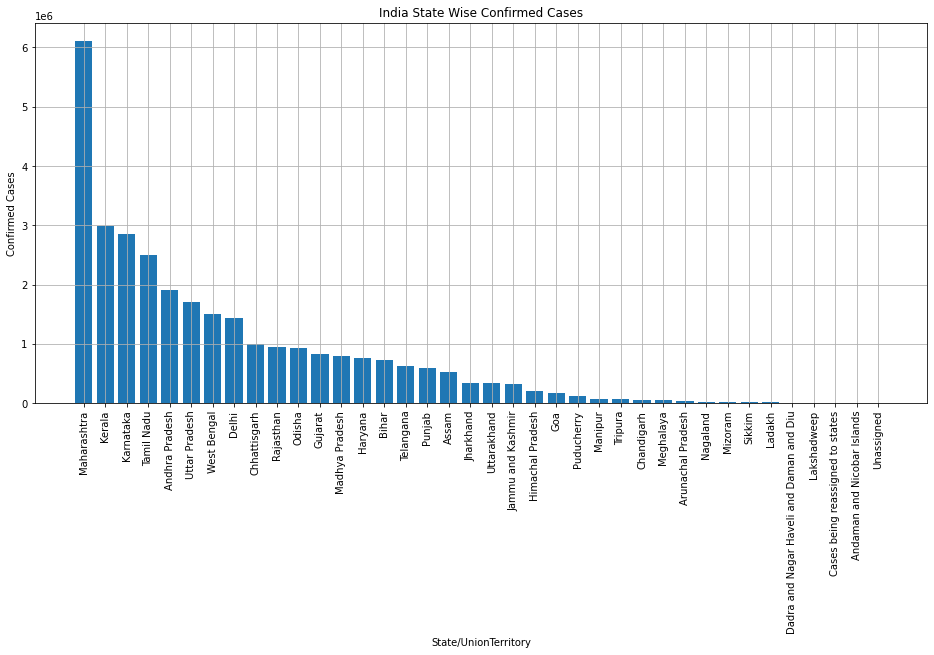

In [69]:
fig = plt.figure(figsize=(16,7))
plt.bar(statewise['State/UnionTerritory'], statewise['Confirmed'])
plt.title("India State Wise Confirmed Cases")
plt.xlabel("State/UnionTerritory")
plt.xticks(rotation=90)
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()

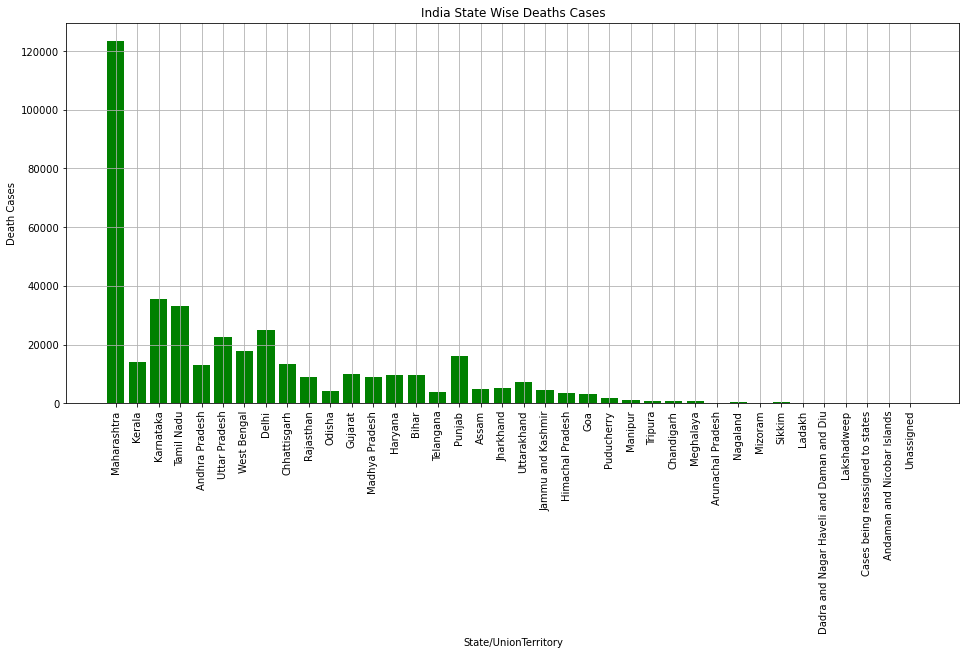

In [70]:
fig = plt.figure(figsize=(16,7))
plt.bar(statewise['State/UnionTerritory'], statewise['Deaths'], color='g')
plt.title("India State Wise Deaths Cases")
plt.xlabel("State/UnionTerritory")
plt.xticks(rotation=90)
plt.ylabel("Death Cases")
plt.grid(True)
plt.show()

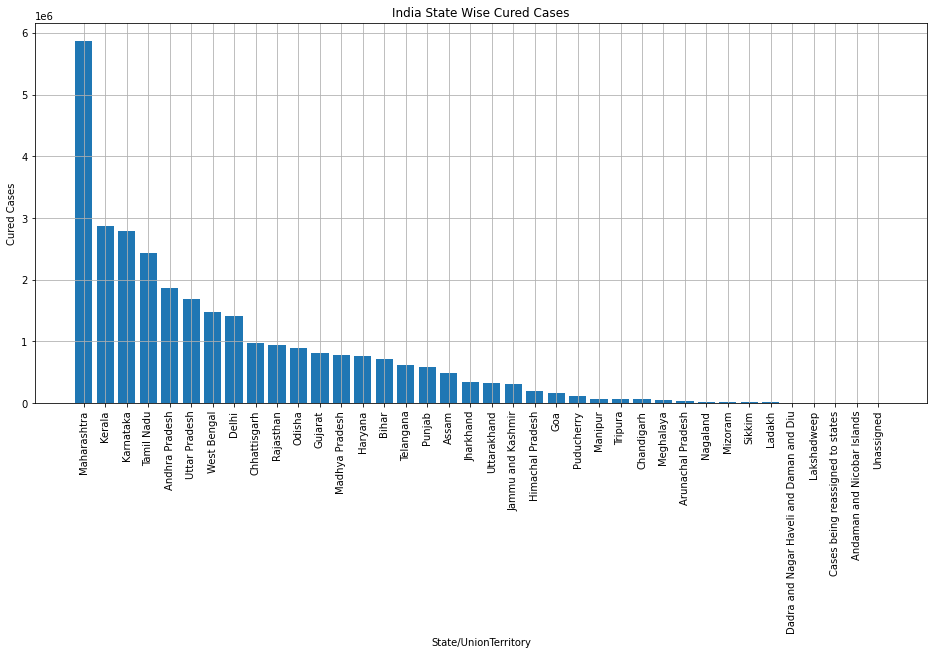

In [71]:
fig = plt.figure(figsize=(16,7))
plt.bar(statewise['State/UnionTerritory'], statewise['Cured'])
plt.title("India State Wise Cured Cases")
plt.xlabel("State/UnionTerritory")
plt.xticks(rotation=90)
plt.ylabel("Cured Cases")
plt.grid(True)
plt.show()

### Time Series Analysis

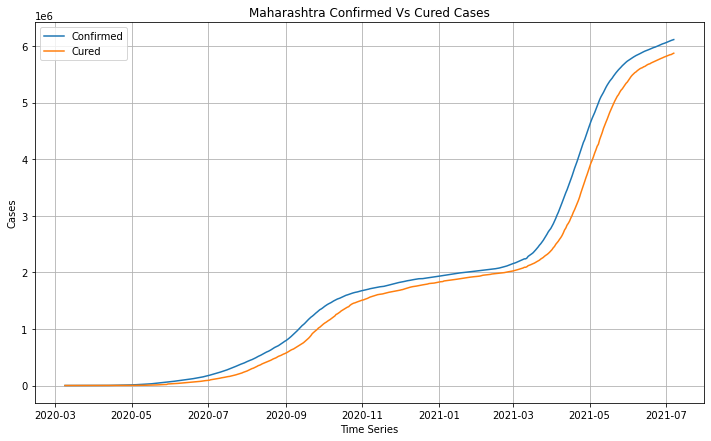

In [72]:
fig = plt.figure(figsize=(12,7))
plt.plot(covid_df[covid_df['State/UnionTerritory'] == 'Maharashtra']['Date'],
         covid_df[covid_df['State/UnionTerritory'] == 'Maharashtra']['Confirmed'])
plt.plot(covid_df[covid_df['State/UnionTerritory'] == 'Maharashtra']['Date'],
         covid_df[covid_df['State/UnionTerritory'] == 'Maharashtra']['Cured'])
plt.title("Maharashtra Confirmed Vs Cured Cases")
plt.legend(['Confirmed','Cured'])
plt.xlabel("Time Series")
plt.ylabel("Cases")
plt.grid(True)
plt.show()

### Cured/Death/Active

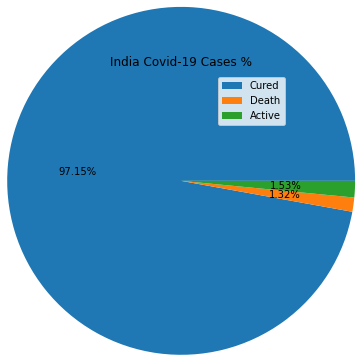

In [73]:
plt.title("India Covid-19 Cases %")
plt.pie(x=[recovery_rate, death_rate, active_rate],
        autopct='%1.2f%%',
        radius=2)
plt.legend(['Cured','Death','Active'])
plt.show()

### Covid Cases In 2020 Vs 2021

In [74]:
total_cases_2021 = covid_df[covid_df['Year'] == 2021].groupby('State/UnionTerritory')[['Cured', 'Deaths', 'Confirmed']].max().sort_values(by='Confirmed', ascending=False).reset_index()

In [75]:
cases_2020 = covid_df[covid_df['Year'] == 2020].groupby('State/UnionTerritory')[['Cured', 'Deaths', 'Confirmed']].max().sort_values(by='Confirmed', ascending=False).reset_index()

In [76]:
cases_2020.drop([5,34], inplace=True)

In [77]:
cases_2020 = cases_2020.reset_index(drop=True)

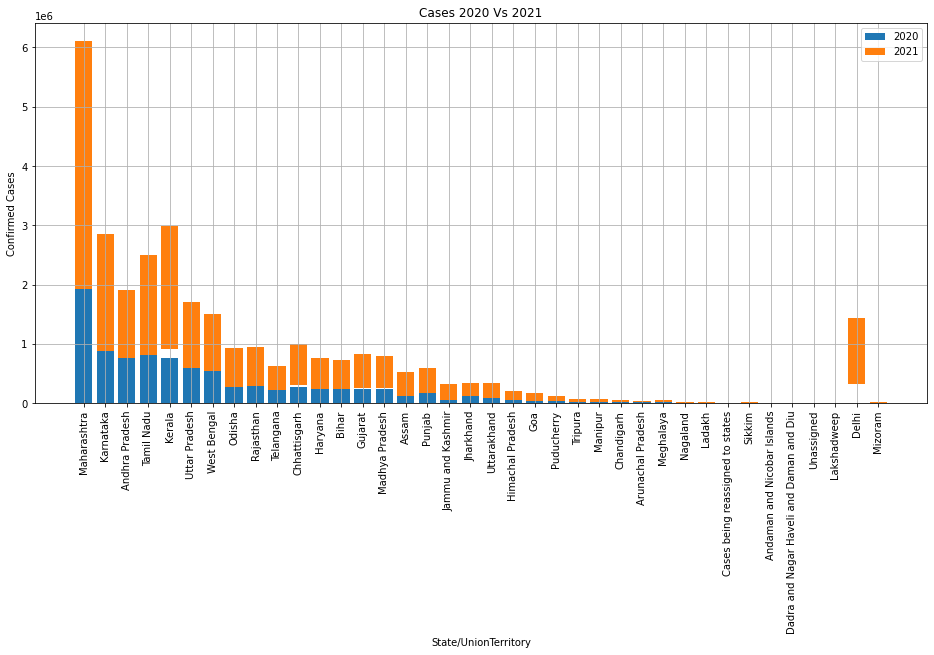

In [78]:
fig = plt.figure(figsize=(16,7))
plt.bar(cases_2020['State/UnionTerritory'],cases_2020['Confirmed'])
plt.bar(total_cases_2021['State/UnionTerritory'],
         (total_cases_2021['Confirmed']-cases_2020['Confirmed']), bottom=cases_2020['Confirmed'])
plt.xlabel('State/UnionTerritory')
plt.ylabel('Confirmed Cases')
plt.legend([2020, 2021])
plt.title('Cases 2020 Vs 2021')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()